## TP 1 DEEP LEARNING DIABETE PREDICTION
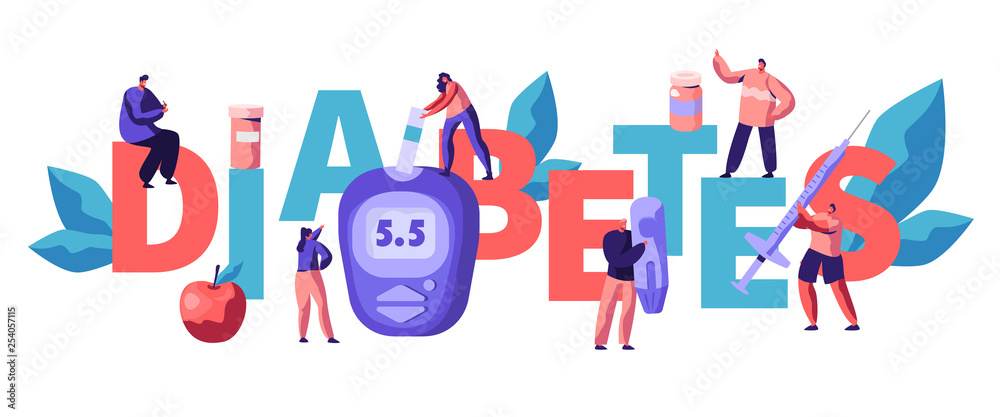

#### load dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
from tensorflow import keras
df = pd.read_csv("pima-indians-diabetes.data.csv",header=None)
X=df.iloc[:,0:-1] #It extracts all the columns except the last one
y=df.iloc[:,-1]  #It extracts just the last column
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### split data into test and train dataset

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

##### Modeling
`activation='relu'`: The activation function used is ReLU (Rectified Linear Unit). It’s a popular choice for hidden layers as it introduces non-linearity and avoids some issues of older functions like sigmoid/tanh.
`activation='sigmoid'`: The sigmoid activation function is commonly used in the output layer for binary classification tasks. It squashes the output between 0 and 1, which is useful for predicting probabilities.

In [2]:
from tensorflow import keras
#Dense is a fully connected layer, where every neuron in the layer is connected to every neuron in the previous layer.
from keras.layers import Dense
#Sequential is a type of model in Keras where you can stack layers one by one. 
from keras.models import Sequential

model = Sequential()
#first layer
model.add(Dense(12, input_shape=(8,), activation='relu')) # 12 = neurons, 8 = 8 inputs
#second layer
model.add(Dense(8, activation='relu')) # activation function for inputs(parameters for inputs)
#the output layer
model.add(Dense(1, activation='sigmoid')) # activation function for the output(parameters for the output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`epochs=150` :epochs: An epoch is one complete pass through the entire training dataset.
In this case, the model will go through the entire training dataset **150 times**.
The higher the number of epochs, the more chances the model has to learn the patterns in the data. **However, too many epochs can lead to overfitting**, where the model learns the training data too well and performs poorly on new data.
``batch_size=10 ``:is the number of samples the model will process before updating its weights.
Instead of processing the entire dataset in one go (which might be computationally expensive), **the training data is divided into mini-batches of size 10.** The model will process 10 samples at a time, compute the loss, update the weights, and then move on to the next batch of 10 samples, continuing until all batches in the dataset are processed.
**=> Once all batches are processed, that's one epoch.**

In [5]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6017 - loss: 4.6246
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6226 - loss: 1.9792
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.6671 - loss: 1.4895
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6579 - loss: 1.1555
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6583 - loss: 0.9236
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6370 - loss: 0.8814
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6495 - loss: 0.8127
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.8139
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.7472
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 0.7174
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.7040
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

#### Model evaluation
``model.evaluate()``returns two values:
**Loss:** This is the first value, which corresponds to the model's loss (error) on the test data, using the same loss function that was specified during the model compilation. In your case, this is binary_crossentropy and The second value corresponds to any additional metric(s) that were specified during compilation, in this case, **accuracy**.
=> __%.2f__ This formats the accuracy to two decimal places


In [9]:
_,accuracy = model.evaluate(X_test, y_test) # loss is ignored by "_"
print('Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 0.6203 
Accuracy: 66.88


=> the occuracy of the training data (76.32%) >> the testing data (66.88%) => **overfitting**
##### The solution : 
1.`` Use Regularization Techniques:`` Regularization helps prevent overfitting by adding constraints to the model's learning process.
-  **L2 Regularization (Weight Decay):** This adds a penalty to large weights in the model, encouraging simpler models that generalize better.
=>**The l2(0.001)** adds a small penalty to large weights, which helps in preventing overfitting.

In [12]:
from keras.regularizers import l2
#add L2 Regularization (Weight Decay)
model.add(Dense(12, input_shape=(8,), activation='relu', kernel_regularizer=l2(0.001)))
#second layer
model.add(Dense(8, activation='relu')) # activation function for inputs(parameters for inputs)
#the output layer
model.add(Dense(1, activation='sigmoid')) # activation function for the output(parameters for the output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4758 - loss: 0.7077
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 0.6815
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6744 - loss: 0.6536
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6834 - loss: 0.6356
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6942 - loss: 0.6227
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6630 - loss: 0.6346
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6371 - loss: 0.6440
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - loss: 0.6150
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 0.6135
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - loss: 0.5928
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.6070
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [13]:
_,accuracy = model.evaluate(X_test, y_test) # loss is ignored by "_"
print('Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 0.6028  
Accuracy: 64.29


##### the ouput of using ``L2 Regularization`` (Weight Decay) : training occuracy: **0.7604** > testing occuracy: **64.29** =>> bad result

- **Dropout**:disables a fraction of neurons during training, which forces the model to learn more robust patterns. You can add dropout layers between the dense layers.

In [14]:
from keras.layers import Dropout

model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dropout(0.2))  # 20% of the neurons are dropped during training
#second layer
model.add(Dense(8, activation='relu')) # activation function for inputs(parameters for inputs)
model.add(Dropout(0.2))  # 20% of the neurons are dropped during training
#the output layer
model.add(Dense(1, activation='sigmoid')) # activation function for the output(parameters for the output)
model.add(Dropout(0.2))  # 20% of the neurons are dropped during training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)


Epoch 1/150


C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4180 - loss: 1.6233
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4184 - loss: 1.6849
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4749 - loss: 1.6761
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 1.6541
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 1.7246
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 2.0810
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 1.6974
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 1.6627
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 1.6095
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 1.5109
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7408 - loss: 1.5534
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - lo

In [15]:
_,accuracy = model.evaluate(X_test, y_test) # loss is ignored by "_"
print('Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6800 - loss: 0.6346
Accuracy: 65.58


##### the ouput of using ``Dropout`` : training occuracy: **0.7424** > testing occuracy: **65.58** =>> respectful result

2. ``Early stopping`` halts training when the model’s performance on the validation data stops improving. This prevents the model from overfitting the training data.

In [16]:
from keras.callbacks import EarlyStopping

#first layer
model.add(Dense(12, input_shape=(8,), activation='relu')) # 12 = neurons, 8 = 8 inputs
#second layer
model.add(Dense(8, activation='relu')) # activation function for inputs(parameters for inputs)
#the output layer
model.add(Dense(1, activation='sigmoid')) # activation function for the output(parameters for the output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop if no improvement for 10 epochs
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, callbacks=[early_stopping])

C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6749 - loss: 0.6858 - val_accuracy: 0.6688 - val_loss: 0.6730
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.6565 - val_accuracy: 0.6494 - val_loss: 0.6450
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.6243 - val_accuracy: 0.6494 - val_loss: 0.6344
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.6028 - val_accuracy: 0.6169 - val_loss: 0.6536
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 0.6419 - val_accuracy: 0.7013 - val_loss: 0.6224
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.6123 - val_accuracy: 0.7013 - val_loss: 0.5919
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7162 - loss: 0.5858 - val_accuracy: 0.7013 - val_loss: 0.6072
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5353 - val_accuracy: 0.6299 - v

In [17]:
_,accuracy = model.evaluate(X_test, y_test) # loss is ignored by "_"
print('Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.5776 
Accuracy: 68.83


##### the ouput of using ``Early stopping`` : training occuracy: **0.7654** > testing occuracy: **68.83** =>> best result as far 

##### run the below code: It creates a set of classifications for each of the testinput, and then prints the first entry in the classifications

In [18]:
prediction =model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


##### 1/ incrase neuron number in dense layer and say how accuracy and time of executing is influenced ( choose 20 and 512)

In [19]:
#Increase to 20 neurons in the first Dense layer
model_20_neurons = Sequential()
model_20_neurons.add(Dense(20, input_shape=(8,), activation='relu'))  # 20 neurons
model_20_neurons.add(Dense(8, activation='relu'))  # 8 neurons as before
model_20_neurons.add(Dense(1, activation='sigmoid'))

model_20_neurons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_20_neurons.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate model
_, accuracy_20_neurons = model_20_neurons.evaluate(X_test, y_test)
print(f'Accuracy with 20 neurons: {accuracy_20_neurons * 100:.2f}%')

C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4258 - loss: 1.5664
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5676 - loss: 0.7110
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6545 - loss: 0.6938
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6370 - loss: 0.6841
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6638 - loss: 0.6770
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6279 - loss: 0.6826
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6697 - loss: 0.6651
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6344 - loss: 0.6711
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.6599
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6355 - loss: 0.6675
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6596 - loss: 0.6555
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

**training occuracy** : 63,01%
**testing occuracy** : 64.29%

In [20]:
#  Increase to 512 neurons in the first Dense layer
model_512_neurons = Sequential()
model_512_neurons.add(Dense(512, input_shape=(8,), activation='relu'))  # 512 neurons
model_512_neurons.add(Dense(8, activation='relu'))  # 8 neurons as before
model_512_neurons.add(Dense(1, activation='sigmoid'))

model_512_neurons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_512_neurons.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate model
_, accuracy_512_neurons = model_512_neurons.evaluate(X_test, y_test)
print(f'Accuracy with 512 neurons: {accuracy_512_neurons * 100:.2f}%')

Epoch 1/150


C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5739 - loss: 2.4929
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6544 - loss: 0.7752
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6263 - loss: 0.8580
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 0.7754
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.6563
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6708 - loss: 0.6297
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6385 - loss: 0.6191
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6731 - loss: 0.6012
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6729 - loss: 0.6024
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6726 - loss: 0.5818
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6280 - loss: 0.6190
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6323 - lo

**training occuracy** : 67,49%
**testing occuracy** : 63.64%
=> overfitting

##### 2/Consider the final (output) layers. Why are there 1 of them? What would happen if you had a different amount than 1? For example, try training the network with different number

In [21]:
model_two_outputs = Sequential()
model_two_outputs.add(Dense(20, input_shape=(8,), activation='relu'))
model_two_outputs.add(Dense(1, activation='sigmoid'))  # Incorrect setup for two outputs
# This will be a binary classification model; we will keep it as is.

model_two_outputs.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (this is still a valid configuration since we keep one output neuron)
model_two_outputs.fit(X_train, y_train, epochs=150, batch_size=10)


C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6342 - loss: 2.1459
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6206 - loss: 1.6456
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.5980 - loss: 1.3049
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6225 - loss: 1.0711  
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6723 - loss: 0.8938
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6463 - loss: 0.7534
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6449 - loss: 0.8159
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 0.7763
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7098 - loss: 0.6745
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.7032 - loss: 0.6830
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6802 - loss: 0.6195
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - a

3/ Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 20 and the final layer

In [22]:
model_with_additional_layer = Sequential()
model_with_additional_layer.add(Dense(20, input_shape=(8,), activation='relu'))  # First hidden layer
model_with_additional_layer.add(Dense(15, activation='relu'))  # New layer added
model_with_additional_layer.add(Dense(1, activation='sigmoid'))  # Output layer

model_with_additional_layer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_with_additional_layer.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate model performance
_, accuracy_with_additional_layer = model_with_additional_layer.evaluate(X_test, y_test)
print(f'Accuracy with additional layer: {accuracy_with_additional_layer * 100:.2f}%')


C:\Users\me\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5479 - loss: 2.2690
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 1.0949
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6567 - loss: 0.7871
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 - loss: 0.8488
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6166 - loss: 0.8766
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.7601
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.7103
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - loss: 0.6980
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6656 - loss: 0.7555
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.6871
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - loss: 0.7059
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

4/  Consider the impact of training for more or less epochs

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7203 - loss: 0.5882 - val_accuracy: 0.6558 - val_loss: 0.6236
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.5486 - val_accuracy: 0.6558 - val_loss: 0.6046
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7169 - loss: 0.5760 - val_accuracy: 0.6623 - val_loss: 0.6628
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.6240 - val_accuracy: 0.6494 - val_loss: 0.6048
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7681 - loss: 0.5489 - val_accuracy: 0.6688 - val_loss: 0.6417
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.5641 - val_accuracy: 0.6558 - val_loss: 0.6222
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5594 - val_accuracy: 0.6623 - val_loss: 0.6431
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.5104 - val_accuracy: 0.6558 - v

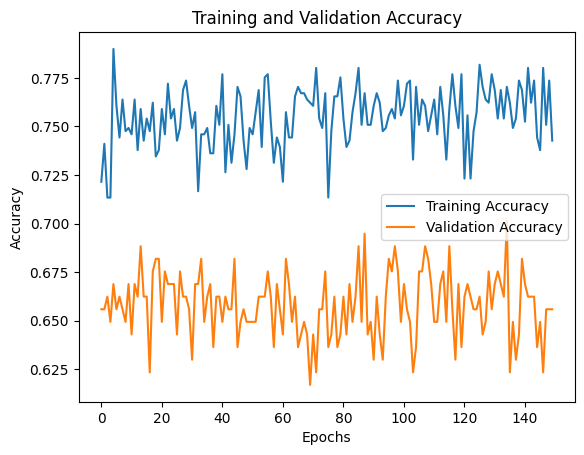

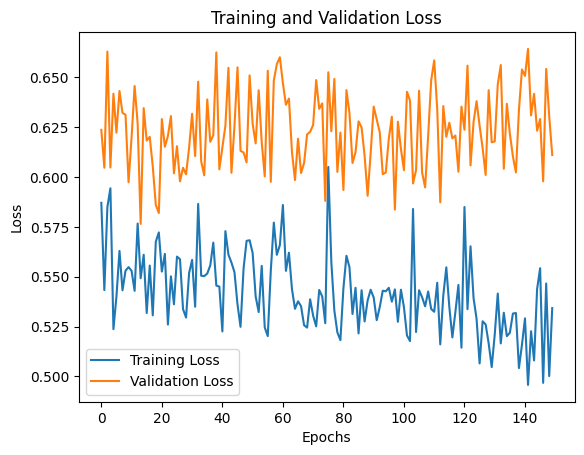

In [23]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


=> There is a noticeable gap between training and validation accuracy, indicating that the model may be overfitting to some extent.

=> The validation accuracy fluctuates widely, suggesting that the model might benefit from techniques like early stopping, regularization, or a different learning rate to stabilize performance.

# General Guidelines for Acceptable Accuracy Differences

- **1-3% Difference**:  
  This is usually acceptable and indicates that the model is generalizing well. For example, a training accuracy of 78% and a test accuracy of 75% is good.

- **5% or More Difference**:  
  This suggests some degree of overfitting. The model may need regularization, more data, or early stopping.

- **10% or More Difference**:  
  This indicates significant overfitting. You might need to simplify the model or apply stronger regularization techniques (e.g., dropout, L2 regularization).

---

# Evaluating Overall Model Performance

In addition to the accuracy difference between training and test data, other important factors help assess whether your model's performance is good:

### a. Baseline Performance  
Compare your model's accuracy with a **baseline model**. A simple baseline model (like predicting the most frequent class) should be your benchmark. If your model performs much better than the baseline, this is a positive sign.

- For example, if a baseline (like a random guesser or majority class predictor) gives 50% accuracy, and your model achieves 80%, this is a clear improvement.

### b. Confusion Matrix and Other Metrics  
**Accuracy** is not always enough to assess model performance, especially for imbalanced datasets. You should also look at other metrics:

- **Precision**: How many of the predicted positives are actually positive?
- **Recall**: How many of the actual positives did the model correctly predict?
- **F1-Score**: The harmonic mean of precision and recall, useful for imbalanced datasets.
- **Confusion Matrix**: It shows the number of correct and incorrect predictions for each class, helping you understand specific errors your model is making.